In [1]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data\dataset_treino.csv')

In [3]:
df.head()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
id                   600 non-null int64
num_gestacoes        600 non-null int64
glicose              600 non-null int64
pressao_sanguinea    600 non-null int64
grossura_pele        600 non-null int64
insulina             600 non-null int64
bmi                  600 non-null float64
indice_historico     600 non-null float64
idade                600 non-null int64
classe               600 non-null int64
dtypes: float64(2), int64(8)
memory usage: 47.0 KB


In [5]:
df.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Let's star with the NA valuew. We already know that the NA values was inputed with 0 values. Unfortunely, 0 is a very possible value for 'num_gestacoes', so in this parameter, we will assume that the 0 values are real value.
### We also know that there are a lot of outliers and because the mean is very affected by then, we will use the median value to deal with the 'NA' values.

In [6]:
#Removing NA values
df['glicose'].replace(to_replace = 0, value = df['glicose'].median(), inplace=True)
df['pressao_sanguinea'].replace(to_replace = 0, value = df['pressao_sanguinea'].median(), inplace=True)
df['grossura_pele'].replace(to_replace = 0, value = df['grossura_pele'].median(), inplace=True)
df['insulina'].replace(to_replace = 0, value = df['insulina'].median(), inplace=True)
df['bmi'].replace(to_replace = 0, value = df['bmi'].median(), inplace=True)
df['indice_historico'].replace(to_replace = 0, value = df['indice_historico'].median(), inplace=True)
df['idade'].replace(to_replace = 0, value = df['idade'].median(), inplace=True)

### In the previous tests, removing the lines with outliers doesen't improve the results. Let's try a different tecnic.

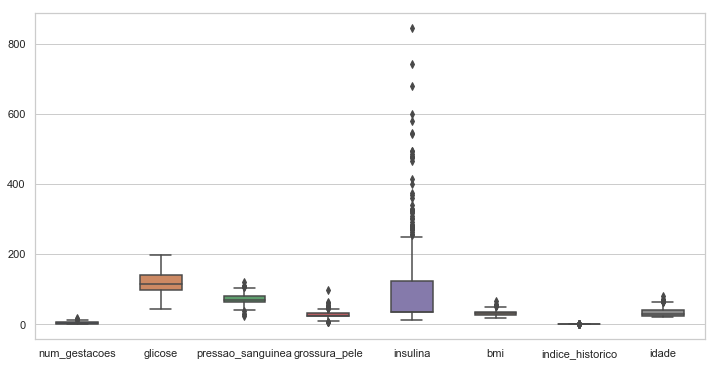

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
#ax.yaxis.set_ticks(range(20,90, 2))
sns.boxplot(data = df.drop(['id','classe'], axis =1), ax= ax, width=.5)

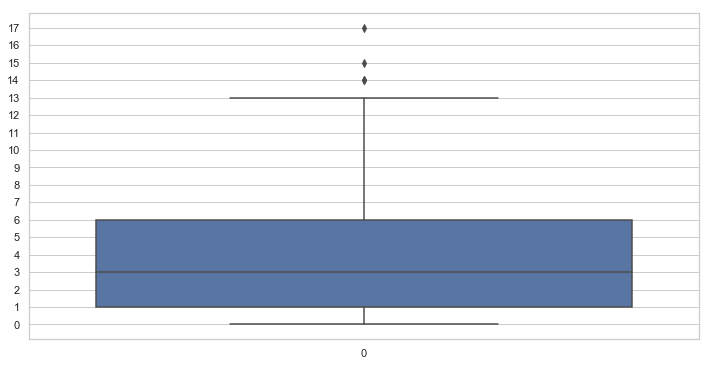

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(0,18))
sns.boxplot(data = df['num_gestacoes'], ax= ax)

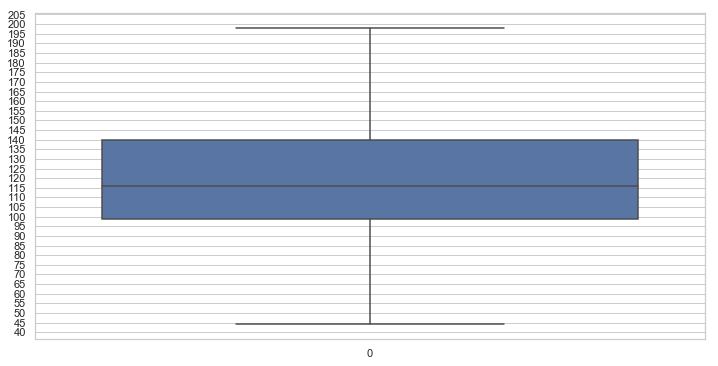

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(40,220, 5))
sns.boxplot(data = df['glicose'], ax= ax)

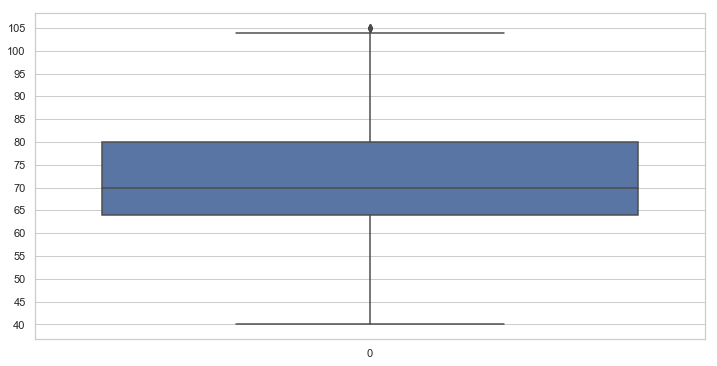

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(40,110, 5))
sns.boxplot(data = df['pressao_sanguinea'], ax= ax)

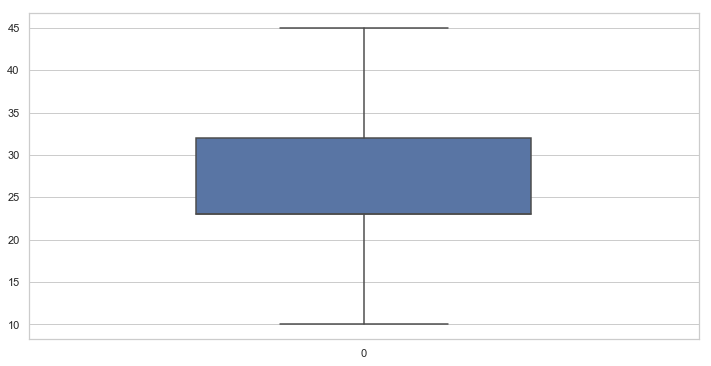

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(10,50, 5))
sns.boxplot(data = df['grossura_pele'], ax= ax, width=.5)

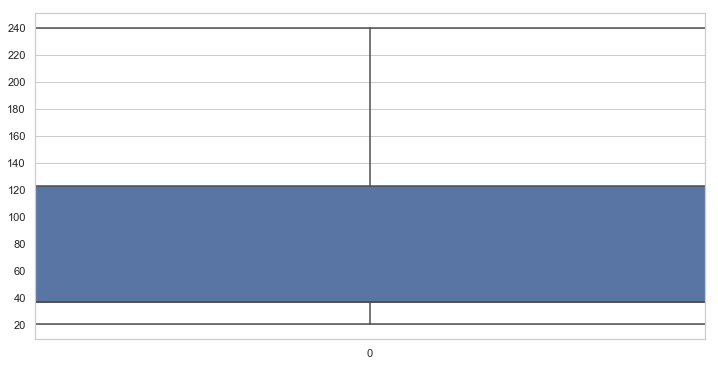

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(0,300, 20))
sns.boxplot(data = df['insulina'], ax= ax, width=2)

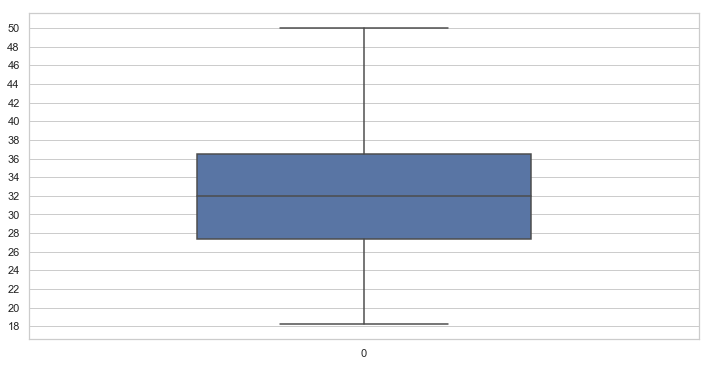

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(0,70, 2))
sns.boxplot(data = df['bmi'], ax= ax, width=.5)

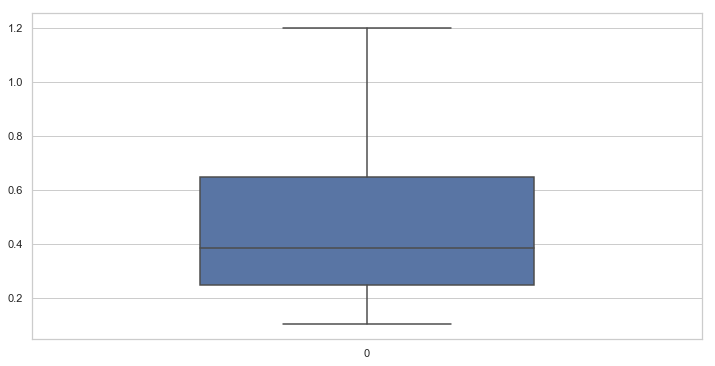

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(np.arange(0,2.5, .2))
sns.boxplot(data = df['indice_historico'], ax= ax, width=.5)

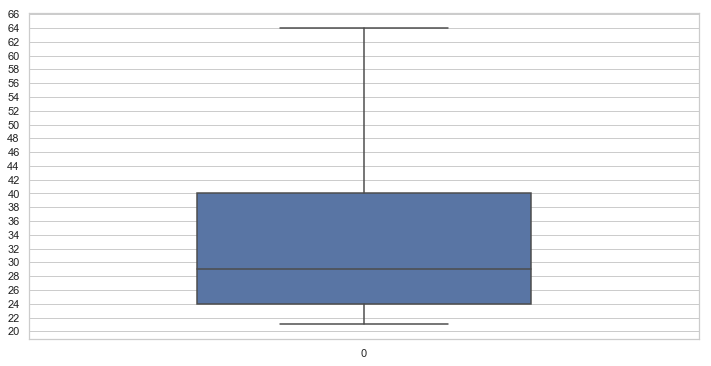

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(20,90, 2))
sns.boxplot(data = df['idade'], ax= ax, width=.5)

In [29]:
#removing outliers
df['glicose'] = [0 if x<0 else 13 if x>13 else x for x in df['glicose']]
df['glicose'] = [45 if x<45 else 200 if x>200 else x for x in df['glicose']]
df['pressao_sanguinea'] = [40 if x<40 else 104 if x>104 else x for x in df['pressao_sanguinea']]
df['grossura_pele'] = [10 if x<10 else 45 if x>45 else x for x in df['grossura_pele']]
df['insulina'] = [20 if x<20 else 240 if x>240 else x for x in df['insulina']]
df['bmi'] = [18 if x<18 else 50 if x>50 else x for x in df['bmi']]
df['indice_historico'] = [.1 if x<.1 else 1.2 if x>1.2 else x for x in df['indice_historico']]
df['idade'] = [21 if x<21 else 64 if x>64 else x for x in df['idade']]

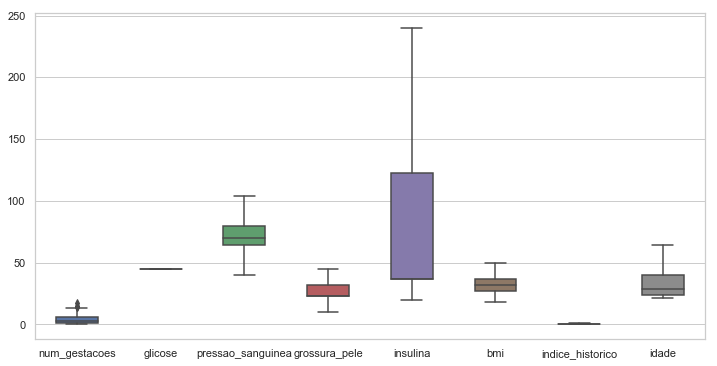

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
#ax.yaxis.set_ticks(range(20,90, 2))
sns.boxplot(data = df.drop(['id','classe'], axis =1), ax= ax, width=.5)